In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, fftshift

**단측파대 fft**

[0:2pi]

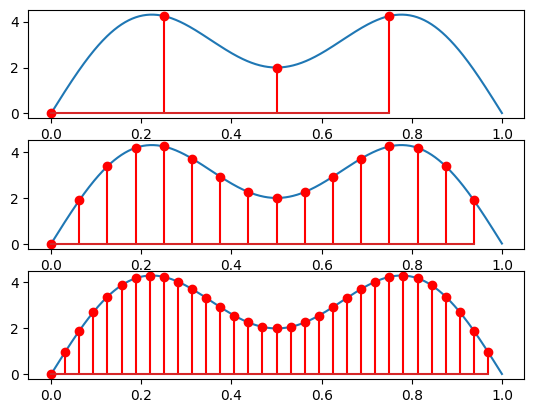

In [2]:
#dft
w = np.arange(0, 2 * np.pi, 1/100);
x = [1, 2, -2, -1];
X = np.zeros(len(w), dtype = complex)
for n in range(len(x)):
    X = X + x[n] * np.exp(-1j * w * n)

fig, ax = plt.subplots(3)

ax[0].plot(w/np.pi/2, np.abs(X));
ax[1].plot(w/np.pi/2, np.abs(X));
ax[2].plot(w/np.pi/2, np.abs(X));

X2 = fft(x);
ax[0].stem(np.arange(0, 1, 1/4), np.abs(X2), 'r');

X3 = fft(x, 16);
ax[1].stem(np.arange(0, 1, 1/16), np.abs(X3), 'r');

X4 = fft(x, 32);
ax[2].stem(np.arange(0, 1, 1/32), np.abs(X4), 'r');

**정현파
fft**

예제 9.8

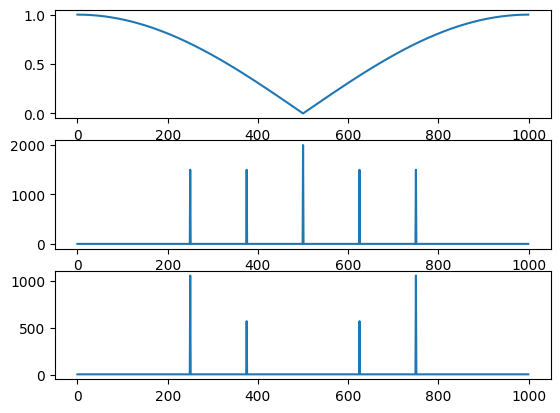

In [3]:
x = lambda A, f, phi, t : A * np.cos(2 * np.pi * f * t + phi)
h = np.array([1, -1])/2;
fs = 1000; st= 0; ed = 1; nTs = np.arange(st, ed+1/fs, 1/fs);


x1 = 2 + x(3, 0.25*fs, np.pi/3, nTs) + x(3, 0.125*fs, np.pi/3, nTs);
w = np.arange(-fs/2, fs/2) / fs;

fig, ax = plt.subplots(3)

ax[0].plot(fftshift(np.abs(fft(h, fs))));
ax[1].plot(fftshift(np.abs(fft(x1, fs))));
ax[2].plot(fftshift(np.abs(fft(np.convolve(x1,h), fs))));

**ctft**

In [2]:
def ctft(x, tp, zr = 1):
  lx = len(x); N = zr*lx;
  X = fftshift(fft(x,N))/lx
  f = np.linspace(-0.5/tp, 0.5/tp, N, endpoint = False)
  return X, f

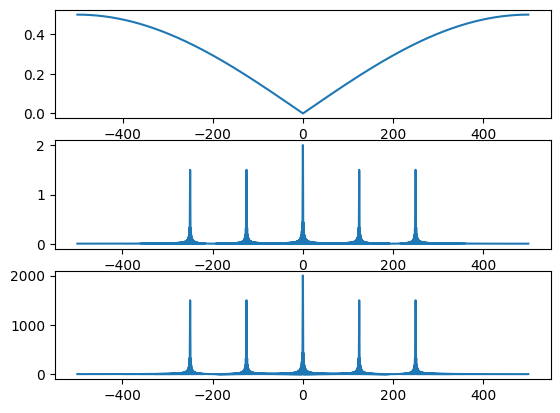

In [6]:
x = lambda A, f, phi, t : A * np.cos(2 * np.pi * f * t + phi)
h = np.array([1, -1])/2;
fs = 1000; st= 0; ed = 1; nTs = np.arange(st, ed+1/fs, 1/fs);

x1 = 2 + x(3, 0.25*fs, np.pi/3, nTs) + x(3, 0.125*fs, np.pi/3, nTs);
w = np.arange(-fs/2, fs/2) / fs;

fig, ax = plt.subplots(3)

H, f = ctft(h, 1/fs, fs); ax[0].plot(f, np.abs(H));
X1, f = ctft(x1, 1/fs, fs); ax[1].plot(f, np.abs(X1));
x2 = np.convolve(x1, fs); X2, f = ctft(x2,1/fs, fs); ax[2].plot(f, np.abs(X2));

**random signal/noise**

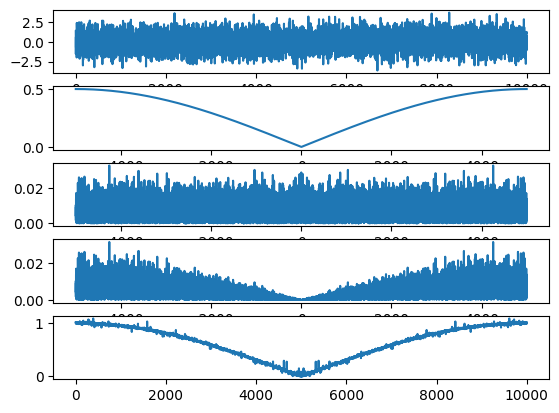

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, fftshift

fs = 10000; st = 0; ed = 1; nTs = np.arange(st, ed+1/fs, 1/fs);

np.random.seed(10); x1 = np.random.randn(fs);

x = lambda A, f, phi, t : A * np.cos(2 * np.pi * f * t + phi)
h = np.array([1, -1])/2;
w = np.arange(-fs/2, fs/2) / fs;

fig, ax = plt.subplots(5)

ax[0].plot(x1);
H, f = ctft(h, 1/fs, fs); ax[1].plot(f, np.abs(H));
X1, f = ctft(x1, 1/fs, fs); ax[2].plot(f, np.abs(X1));
x2 = np.convolve(x1, h); X2, f = ctft(x2,1/fs, fs); ax[3].plot(f, np.abs(X2));
hh = np.abs(fft(x2, fs) / fft(x1,fs)); ax[4].plot(fftshift(hh));

**Zplane plot**

In [7]:
# 극점-영점 계산과 플롯
def zplane(b, a, ax, auto_scale=True, rmax=1.5):
    """
    zplane: plot pole-zero pattern in the complex z-plane
    given a transfer function.
    parameters:
        b = numerator coefficients
        a = denominator coefficients
        (z,p,k) = array of zeros, poles, and gain
    """
    # 단위원
    theta = np.linspace(0, 2 * np.pi, 360)
    ax.plot(np.cos(theta), np.sin(theta), color='0.4', lw=0.5)

    # 극점-영점 계산
    z, p, k = signal.tf2zpk(b, a)
    if len(z)>0:
        # 영점의 다중성 점검
        z_unique, z_multi = signal.unique_roots(z, tol=1e-04)
        unique = z_unique[z_multi>1]
        multi = z_multi[z_multi>1]
        # 영점 플롯
        ax.plot(z_unique.real, z_unique.imag, color='C1', marker='o', mfc='none', lw=0, ms=8)
        if len(multi>1)!=0:
            for m, zk in enumerate(unique):
                ax.text(zk.real+0.06, zk.imag+0.07, '('+str(multi[m])+')')
    if len(p)>0:
        # 극점의 다중성 점검
        p_unique, p_multi = signal.unique_roots(p, tol=1e-04)
        unique = p_unique[p_multi > 1]
        multi = p_multi[p_multi > 1]
        if len(multi > 1) != 0:
            for m, zk in enumerate(unique):
                ax.text(zk.real+0.06, zk.imag+0.07, '(' + str(multi[m]) + ')')
        # 극점 플롯
        ax.plot(p_unique.real, p_unique.imag, color='C1', marker='x', mfc='none', lw=0, ms=8)
    # 축 설정
    zp = np.concatenate((z, p))
    if auto_scale:
        r = np.max(np.abs(zp)) + 0.5
    else:
        r = rmax
    ax.axhline(0, color='0.5',lw=0.5)
    ax.axvline(0, color='0.5',lw=0.5)
    ax.set_xlim([-r, r]); ax.set_ylim([-r, r])
    ax.set_xlabel('Real')
    ax.set_ylabel('Imag')
    ax.set_title('pole-zero plot')
    ax.set_aspect('equal')
    return z, p, k

[-1.  0.] [0.35+0.60621778j 0.35-0.60621778j] 2.0


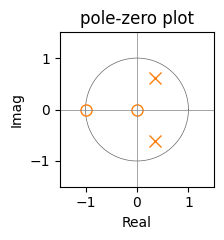

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

b = np.array([2, 2, 0])
a = np.array([1, -0.7, 0.49])
# 극점-영점 계산과 플롯
fig, ax = plt.subplots(figsize=(2.5,2.5))
z, p, k = zplane(b, a, ax)
print(z, p, k)
fig.tight_layout()